# Setup

In [1]:
# import packages
%run ../global_packages.py

# get the global parameters
%run ../global_pars.py

# import your local functions
sys.path.insert(1, '../')
from global_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

# Paths and Parameters

In [2]:
figpath = '../figures/'

# Get Data

In [3]:
ds_WOD = xr.open_dataset('../data_processing/1_WOD_Coastal/wod_coastal_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                (depth: 97, time_eAS: 21832, time_eBoB: 20458, time_wAS: 30300, time_wBoB: 2496)
Coordinates:
  * time_wAS               (time_wAS) datetime64[ns] 1958-01-16 ... 2020-05-23
  * time_eAS               (time_eAS) datetime64[ns] 1958-01-02 ... 2020-05-31
  * time_wBoB              (time_wBoB) datetime64[ns] 1959-08-20 ... 2020-05-28
  * time_eBoB              (time_eBoB) datetime64[ns] 1958-02-05 ... 2020-05-29
  * depth                  (depth) int64 0 5 10 15 20 ... 4700 4800 4900 5000
Data variables:
    lat_wAS                (time_wAS) float32 ...
    lon_wAS                (time_wAS) float32 ...
    mon_wAS                (time_wAS) int64 ...
    seas_wAS               (time_wAS) int64 ...
    lat_eAS                (time_eAS) float32 ...
    lon_eAS                (time_eAS) float32 ...
    mon_eAS                (time_eAS) int64 ...
    seas_eAS               (time_eAS) int64 ...
    lat_wBoB               (time_wBoB) float32 ...
    lon

In [4]:
# DMI
ds_DMI= xr.open_dataset('../data_processing/3_DMI/dmi_processed.nc')

posIODyears = list(np.array(ds_DMI.pos_IOD_years))
sposIODyears = list(np.array(ds_DMI.spos_IOD_years))
negIODyears = list(np.array(ds_DMI.neg_IOD_years))
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 747, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-03-01 1958-04-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

# Group Into IOD Years

In [5]:
depth = '50_200'
Depth = '50-200'
############################################################################################################
# Western Arabian Sea
############################################################################################################
doxy = ds_WOD['doxy_wAS_' + depth]
lat = ds_WOD.lat_wAS
lon = ds_WOD.lon_wAS
t = ds_WOD.time_wAS

# positive IOD years -------------------------------------------# 
posIODdata_wAS,_,_,posIODtime_wAS,posIODmon_wAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             posIODyears, region = 'wAS')
# strong positive IOD years -------------------------------------------# 
sposIODdata_wAS,_,_,sposIODtime_wAS,sposIODmon_wAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             sposIODyears, region = 'wAS')

# negative IOD years -------------------------------------------# 
negIODdata_wAS,_,_,_,negIODmon_wAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             negIODyears, region = 'wAS')

# neutral IOD years -------------------------------------------# 
neuIODdata_wAS,_,_,_,neuIODmon_wAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             neuIODyears, region = 'wAS')

############################################################################################################
# Eastern Arabian Sea
############################################################################################################
doxy = ds_WOD['doxy_eAS_' + depth]
lat = ds_WOD.lat_eAS
lon = ds_WOD.lon_eAS
t = ds_WOD.time_eAS

# positive IOD years -------------------------------------------# 
posIODdata_eAS,_,_,_,posIODmon_eAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             posIODyears, region = 'eAS')

# strong positive IOD years -------------------------------------------# 
sposIODdata_eAS,_,_,_,sposIODmon_eAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             sposIODyears, region = 'eAS')

# negative IOD years -------------------------------------------# 
negIODdata_eAS,_,_,_,negIODmon_eAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             negIODyears, region = 'eAS')

# neutral IOD years -------------------------------------------# 
neuIODdata_eAS,_,_,_,neuIODmon_eAS,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             neuIODyears, region = 'eAS')

############################################################################################################
# Western Bay of Bengal
############################################################################################################
doxy = ds_WOD['doxy_wBoB_' + depth]
lat = ds_WOD.lat_wBoB
lon = ds_WOD.lon_wBoB
t = ds_WOD.time_wBoB

# positive IOD years -------------------------------------------# 
posIODdata_wBoB,_,_,_,posIODmon_wBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             posIODyears, region = 'wBoB')
# strong positive IOD years -------------------------------------------# 
sposIODdata_wBoB,_,_,_,sposIODmon_wBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             sposIODyears, region = 'wBoB')
# negative IOD years -------------------------------------------# 
negIODdata_wBoB,_,_,_,negIODmon_wBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             negIODyears, region = 'wBoB')

# neutral IOD years -------------------------------------------# 
neuIODdata_wBoB,_,_,_,neuIODmon_wBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             neuIODyears, region = 'wBoB')

############################################################################################################
# Eastern Bay of Bengal
############################################################################################################
doxy = ds_WOD['doxy_eBoB_' + depth]
lat = ds_WOD.lat_eBoB
lon = ds_WOD.lon_eBoB
t = ds_WOD.time_eBoB

# positive IOD years -------------------------------------------# 
posIODdata_eBoB,_,_,_,posIODmon_eBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             posIODyears, region = 'eBoB')
# strong positive IOD years -------------------------------------------# 
sposIODdata_eBoB,_,_,_,sposIODmon_eBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             sposIODyears, region = 'eBoB')
# negative IOD years -------------------------------------------# 
negIODdata_eBoB,_,_,_,negIODmon_eBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             negIODyears, region = 'eBoB')

# neutral IOD years -------------------------------------------# 
neuIODdata_eBoB,_,_,_,neuIODmon_eBoB,_ = IOD_year_group_WOD(doxy,
                                             lat,lon,t,
                                             IODyear_begin,IODyear_end,
                                             neuIODyears, region = 'eBoB')



# Bar Chart

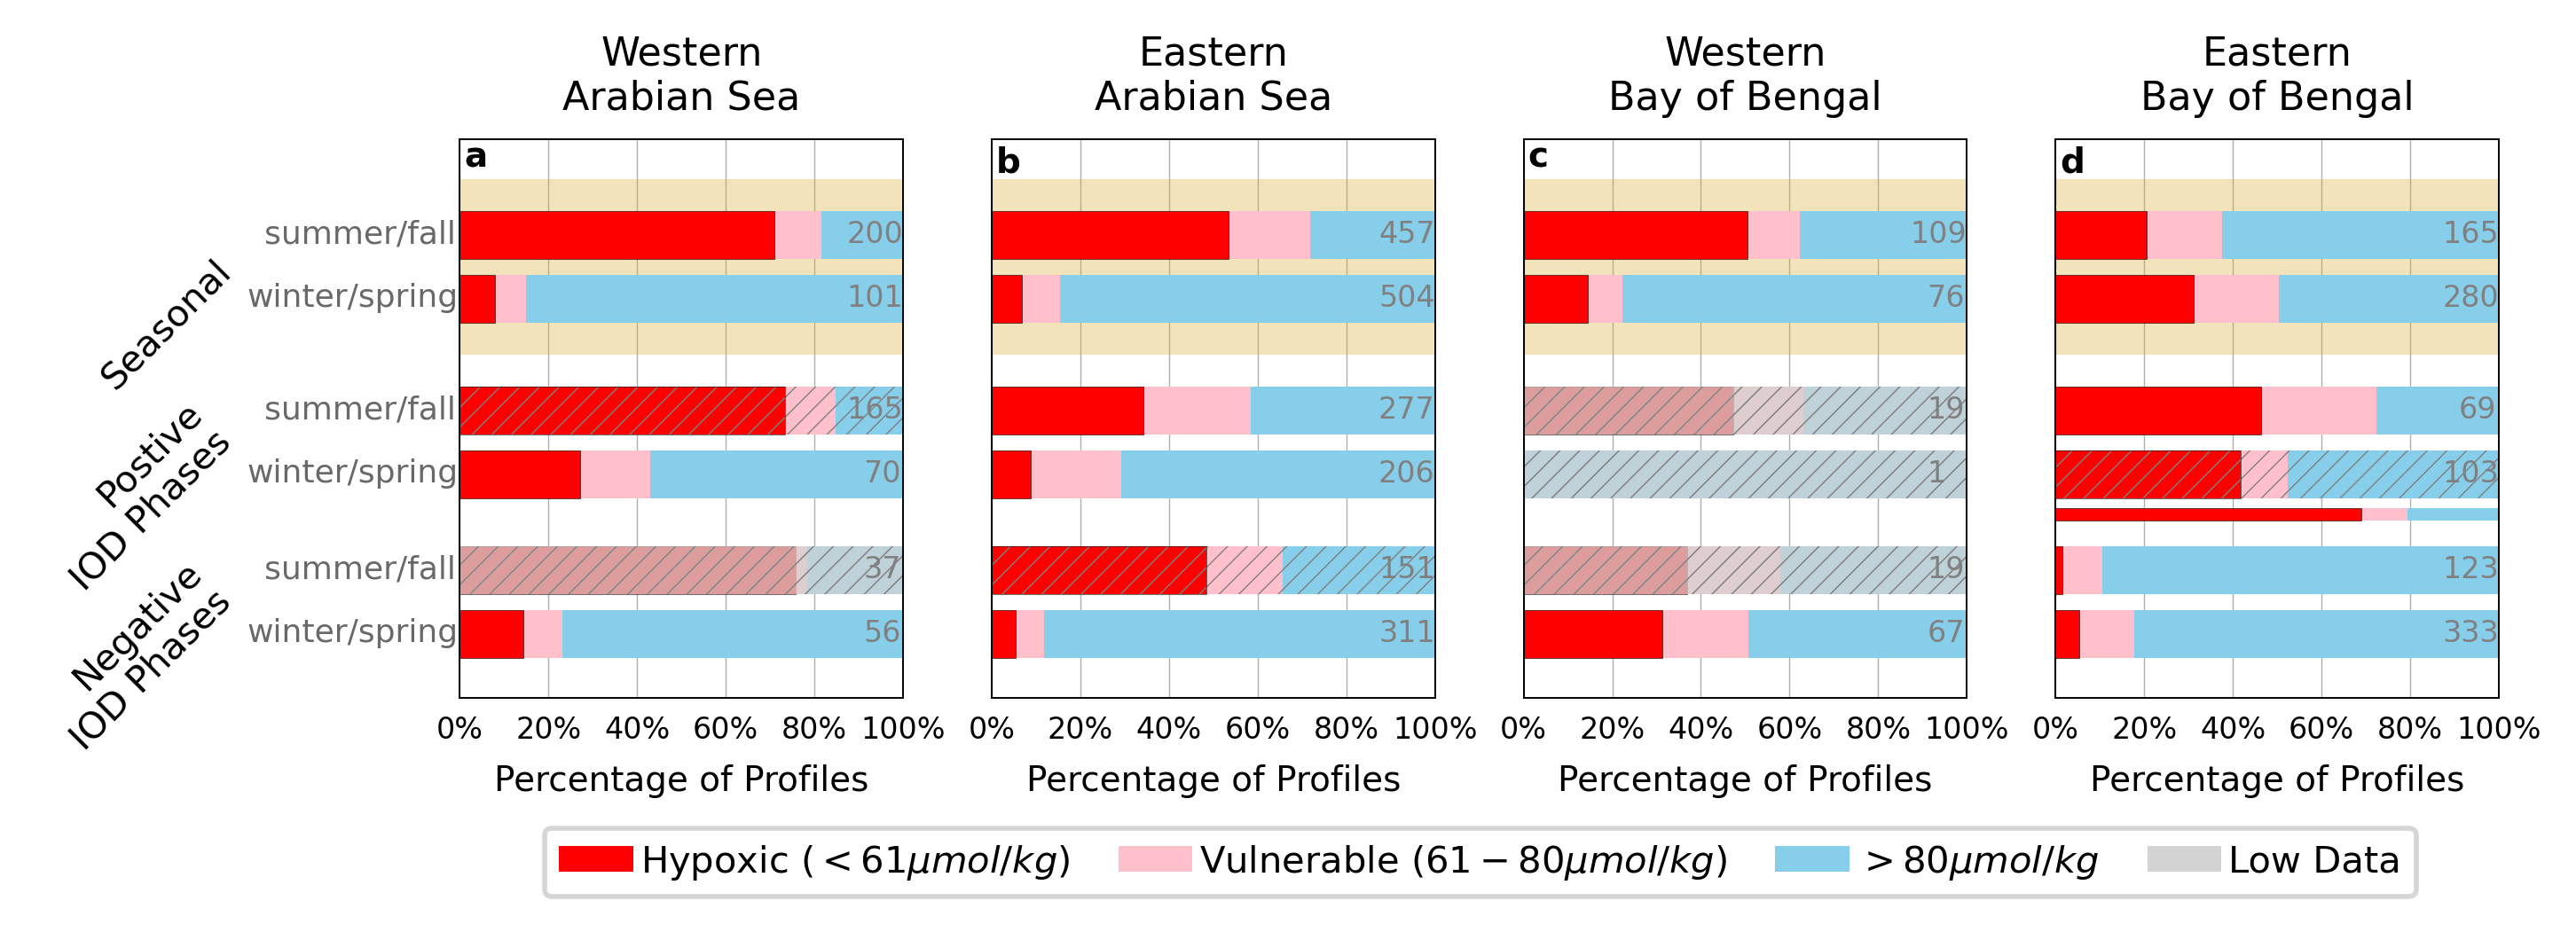

In [6]:
low_data = 40

import warnings
warnings.filterwarnings('ignore')

# Make Histograms 
# hatch_mask = min_mean > hyp_thresh
letters = ['a','b','c','d','e','f']
x = [1,2,3,4]

fig = plt.figure(figsize=(17.8 / 2.54, 2.5), dpi=400)
# ax2 = fig.add_subplot(2,1,1); ax2.yaxis.grid(color='gainsboro');ax2.set_axisbelow(True) 
# ax3 = fig.add_subplot(2,1,2); ax3.yaxis.grid(color='gainsboro');ax3.set_axisbelow(True) 

params = {'legend.fontsize': 7.5,
         'axes.labelsize': 7,
         'axes.titlesize': 8,
         'xtick.labelsize':6,
         'ytick.labelsize':6,
         'hatch.color': 'gray',
          'hatch.linewidth': 0.25,
          'axes.linewidth':0.35,
         'xtick.major.width':0,
         'xtick.major.size':0,
         'ytick.major.width':0,
         'ytick.major.size':0}

pylab.rcParams.update(params)

lw = 0.1
text_fz = 6
sq_sz = 20
lfz = 7
height = 0.3
baralpha = 0.75
cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#D3D3D3','#DcDcDc','#F0F0F0'],
                           [0,0.4,0.6,0.8,0.9,1])

clrs = ['red','pink','skyblue']

cmap = plt.cm.PuOr_r
cmin = -0.15
cmax = 0.15

regions = ['Western\nArabian Sea','Eastern\nArabian Sea','Western\nBay of Bengal','Eastern\nBay of Bengal']
# ylabels = ['Negative\nIOD Phases','Postive\nIOD Phases','Neutral\nIOD Phases']
ylabels = ['Negative\nIOD Phases','Postive\nIOD Phases','Seasonal']
llabels = ['Hypoxic ($<61 \mu mol/kg$)', 'Vulnerable ($61-80 \mu mol/kg$)','$>80 \mu mol/kg$','Low Data']

####################################################################################################
# Bar Charts
####################################################################################################
# data_wAS = [ds_WOD.doxy_wAS_50_200,posIODdata_wAS,negIODdata_wAS,sposIODdata_wAS]
# data_eAS = [ds_WOD.doxy_eAS_50_200,posIODdata_eAS,negIODdata_eAS,sposIODdata_eAS]
# data_wBoB = [ds_WOD.doxy_wBoB_50_200,posIODdata_wBoB,negIODdata_wBoB,sposIODdata_wBoB]
# data_eBoB = [ds_WOD.doxy_eBoB_50_200,posIODdata_eBoB,negIODdata_eBoB,sposIODdata_eBoB]

# time_data_wAS = [ds_WOD.mon_wAS,posIODmon_wAS,negIODmon_wAS,sposIODmon_wAS]
# time_data_eAS = [ds_WOD.mon_eAS,posIODmon_eAS,negIODmon_eAS,sposIODmon_eAS]
# time_data_wBoB = [ds_WOD.mon_wBoB,posIODmon_wBoB,negIODmon_wBoB,sposIODmon_wBoB]
# time_data_eBoB = [ds_WOD.mon_eBoB,posIODmon_eBoB,negIODmon_eBoB,sposIODmon_eBoB]

data_wAS = [neuIODdata_wAS,posIODdata_wAS,negIODdata_wAS,sposIODdata_wAS]
data_eAS = [neuIODdata_eAS,posIODdata_eAS,negIODdata_eAS,sposIODdata_eAS]
data_wBoB = [neuIODdata_wBoB,posIODdata_wBoB,negIODdata_wBoB,sposIODdata_wBoB]
data_eBoB = [neuIODdata_eBoB,posIODdata_eBoB,negIODdata_eBoB,sposIODdata_eBoB]

time_data_wAS = [neuIODmon_wAS,posIODmon_wAS,negIODmon_wAS,sposIODmon_wAS]
time_data_eAS = [neuIODmon_eAS,posIODmon_eAS,negIODmon_eAS,sposIODmon_eAS]
time_data_wBoB = [neuIODmon_wBoB,posIODmon_wBoB,negIODmon_wBoB,sposIODmon_wBoB]
time_data_eBoB = [neuIODmon_eBoB,posIODmon_eBoB,negIODmon_eBoB,sposIODmon_eBoB]

for pp in range(4):

    if pp==0:
        sdata = data_wAS[0]
        pdata = data_wAS[1]
        ndata = data_wAS[2]
        spdata = data_wAS[3]
        
        stdata = time_data_wAS[0]
        ptdata = time_data_wAS[1]
        ntdata = time_data_wAS[2]
        sptdata = time_data_wAS[3]

    elif pp==1:
        sdata = data_eAS[0]
        pdata = data_eAS[1]
        ndata = data_eAS[2]
        spdata = data_eAS[3]
        
        stdata = time_data_eAS[0]
        ptdata = time_data_eAS[1]
        ntdata = time_data_eAS[2]
        sptdata = time_data_eAS[3]

    elif pp==2:
        sdata = data_wBoB[0]
        pdata = data_wBoB[1]
        ndata = data_wBoB[2]
        spdata = data_wBoB[3]
        
        stdata = time_data_wBoB[0]
        ptdata = time_data_wBoB[1]
        ntdata = time_data_wBoB[2]
        sptdata = time_data_wBoB[3]

    else:
        sdata = data_eBoB[0]
        pdata = data_eBoB[1]
        ndata = data_eBoB[2]
        spdata = data_eBoB[3]
        
        stdata = time_data_eBoB[0]
        ptdata = time_data_eBoB[1]
        ntdata = time_data_eBoB[2]
        sptdata = time_data_eBoB[3]

    # O2
    x1 = sdata[~np.isnan(sdata)]
    x2 = pdata[~np.isnan(pdata)]
    x3 = ndata[~np.isnan(ndata)]
    x4 = spdata[~np.isnan(spdata)]

    x1t = stdata[~np.isnan(sdata)]
    x2t = ptdata[~np.isnan(pdata)]
    x3t = ntdata[~np.isnan(ndata)]
    x4t = sptdata[~np.isnan(spdata)]

    # get seasonal indicies
    ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
    ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

    x1_sf = x1[ind_sf]
    x1_ws = x1[ind_ws]

    ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
    ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

    x2_sf = x2[ind_sf]
    x2_ws = x2[ind_ws]

    ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
    ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

    x3_sf = x3[ind_sf]
    x3_ws = x3[ind_ws]
    
    ind_sf = (x4t == 6) | (x4t == 7) | (x4t == 8) | (x4t == 9) | (x4t == 10) | (x4t == 11)
    ind_ws = (x4t == 12) | (x4t == 1) | (x4t == 2) | (x4t == 3) | (x4t == 4) | (x4t ==5)

    x4_sf = x4[ind_sf]
    x4_ws = x4[ind_ws]
    
    # sort
    x1_sf = np.sort(x1_sf)
    x2_sf = np.sort(x2_sf)
    x3_sf = np.sort(x3_sf)
    x4_sf = np.sort(x4_sf)
    
    x1_ws = np.sort(x1_ws)
    x2_ws = np.sort(x2_ws)
    x3_ws = np.sort(x3_ws)
    x4_ws = np.sort(x4_ws)
    
    # ks test
    if (len(x1_sf)>0) & (len(x2_sf)>0):
        pos_all_ks_sf = stats.ks_2samp(x1_sf,x2_sf)
    if (len(x1_sf)>0) & (len(x3_sf)>0):    
        neg_all_ks_sf = stats.ks_2samp(x1_sf,x3_sf)
    if (len(x2_sf)>0) & (len(x3_sf)>0):
        pos_neg_ks_sf = stats.ks_2samp(x2_sf,x3_sf)
    if (len(x2_sf)>0) & (len(x4_sf)>0):
        pos_spos_ks_sf = stats.ks_2samp(x2_sf,x4_sf)

    if (len(x1_ws)>0) & (len(x2_ws)>0):
        pos_all_ks_ws = stats.ks_2samp(x1_ws,x2_ws)
    if (len(x1_ws)>0) & (len(x3_ws)>0):
        neg_all_ks_ws = stats.ks_2samp(x1_ws,x3_ws)
    if (len(x2_ws)>0) & (len(x3_ws)>0):
        pos_neg_ks_ws = stats.ks_2samp(x2_ws,x3_ws)
    if (len(x2_ws)>0) & (len(x4_ws)>0):
        pos_spos_ks_ws = stats.ks_2samp(x2_ws,x4_ws)
    

    # 80
    seas_hyp_c_sf = np.round(np.sum(x1_sf<80)/len(x1_sf)*100,2)
    piod_hyp_c_sf = np.round(np.sum(x2_sf<80)/len(x2_sf)*100,2)
    niod_hyp_c_sf = np.round(np.sum(x3_sf<80)/len(x3_sf)*100,2)
    spiod_hyp_c_sf = np.round(np.sum(x4_sf<80)/len(x4_sf)*100,2)
    
    # 61
    seas_hyp_sf = np.round(np.sum(x1_sf<61)/len(x1_sf)*100,2)
    piod_hyp_sf = np.round(np.sum(x2_sf<61)/len(x2_sf)*100,2)
    niod_hyp_sf = np.round(np.sum(x3_sf<61)/len(x3_sf)*100,2)
    spiod_hyp_sf = np.round(np.nansum(x4_sf<61)/len(x4_sf)*100,2)
    
    # close to hypoxic 
    seas_hyp_c_ws = np.round(np.sum(x1_ws<80)/len(x1_ws)*100,2)
    piod_hyp_c_ws = np.round(np.sum(x2_ws<80)/len(x2_ws)*100,2)
    niod_hyp_c_ws = np.round(np.sum(x3_ws<80)/len(x3_ws)*100,2)
    spiod_hyp_c_ws = np.round(np.sum(x4_ws<80)/len(x4_ws)*100,2)

    # percents 
    seas_hyp_ws = np.round(np.sum(x1_ws<61)/len(x1_ws)*100,2)
    piod_hyp_ws = np.round(np.sum(x2_ws<61)/len(x2_ws)*100,2)
    niod_hyp_ws = np.round(np.sum(x3_ws<61)/len(x3_ws)*100,2)
    spiod_hyp_ws = np.round(np.sum(x4_ws<61)/len(x4_ws)*100,2)

    ax = fig.add_subplot(1,4,pp+1)
    ax.grid(axis='x', which='both', linewidth = 0.25)
    ax.set_axisbelow(True)

    ############# seasonal ##########################################
    y1 = 3.2
    y2 = 2.8
    
    ax.axhspan(y1+.35, y2-.35,color='goldenrod',alpha=0.3, linewidth = 0)
    
    # ---- s/f ----------------------------------------------#
    ax.barh(y1,width = 100, height = height,color=clrs[2], align='center')
    ax.barh(y1,width = seas_hyp_c_sf,height = height,color=clrs[1], align='center')
    ax.barh(y1,width = seas_hyp_sf,height = height,color=clrs[0], align='center',
            edgecolor='k', linewidth = lw)
    
    # low data
    if len(x1_sf)<low_data:
            ax.barh(y1,width = 100, height = height,color='lightgray', 
                    align='center', hatch = '//////', alpha = baralpha)
            
    # no obs/season
    if len(x1_sf) < 100:
        ax.text(91,y1-.05,'%d' % len(x1_sf),fontsize = text_fz, color = 'gray')
    else:
        ax.text(87.25,y1-.05,'%d' % len(x1_sf),fontsize = text_fz, color = 'gray')
    if pp == 0:
        ax.text(-44,y1-.05,'summer/fall',fontsize = text_fz+0.5, color = 'dimgray')
    
    # ---- w/s ----------------------------------------------#
    ax.barh(y2,width = 100, height = height,color=clrs[2], align='center')
    ax.barh(y2,width = seas_hyp_c_ws,height = height,color=clrs[1], align='center',)
    ax.barh(y2,width = seas_hyp_ws,height = height,color=clrs[0], align='center',
            edgecolor='k', linewidth = lw)
    
    # low data
    if len(x1_ws)<low_data:
            ax.barh(y2,width = 100, height = height,color='lightgray', 
                    align='center', hatch = '//////', alpha = baralpha)
        
    # no obs/season
    if len(x1_ws) < 100:
        ax.text(91,y2-.05,'%d' % len(x1_ws),fontsize = text_fz, color = 'gray')
    else:
        ax.text(87.25,y2-.05,'%d' % len(x1_ws),fontsize = text_fz, color = 'gray')
    if pp == 0:
        ax.text(-48,y2-.05,'winter/spring',fontsize = text_fz+0.5, color = 'dimgray')
    
    ############# positive IODs ##########################################
    y1 = 2.1
    y2 = 1.7
    
    # ---- s/f ----------------------------------------------#
    # cdf pvals
    if pos_all_ks_sf[1] > 0.05:
        ax.barh(y1,width = 100, height = height,color=clrs[2], align='center', hatch = '//////')
        ax.barh(y1,width = piod_hyp_c_sf,height = height,color=clrs[1], align='center', hatch = '//////')
        ax.barh(y1,width = piod_hyp_sf,height = height,color=clrs[0], align='center', hatch = '//////')
        ax.barh(y1,width = piod_hyp_sf,height = height,color='none', align='center',
                edgecolor='k', linewidth = lw)
        
        # low data
        if len(x2_sf)<low_data:
            ax.barh(y1,width = 100, height = height,color='lightgray', 
                    align='center', hatch = '//////', alpha = baralpha)

    else:
        ax.barh(y1,width = 100, height = height,color=clrs[2], align='center')
        ax.barh(y1,width = piod_hyp_c_sf,height = height,color=clrs[1], align='center',)
        ax.barh(y1,width = piod_hyp_sf,height = height,color=clrs[0], align='center',
                edgecolor='k', linewidth = lw)
        
        # low data
        if len(x2_sf)<low_data:
            ax.barh(y1,width = 100, height = height,color='lightgray', 
                    align='center', alpha = baralpha)
    
    # no obs/season
    if len(x2_sf) < 100:
        ax.text(91, y1-.05,'%d' % len(x2_sf),fontsize = text_fz, color = 'gray')
    else:
        ax.text(87.25,y1-.05,'%d' % len(x2_sf),fontsize = text_fz, color = 'gray')
    if pp == 0:
        ax.text(-44,y1-.05,'summer/fall',fontsize = text_fz+0.5, color = 'dimgray')
    
    # ---- w/s ----------------------------------------------#
    
    # cdfs pval winter
    if pos_all_ks_ws[1] > 0.05:
        
        ax.barh(y2,width = 100, height = height,color=clrs[2], align='center', hatch = '//////')
        ax.barh(y2,width = piod_hyp_c_ws,height = height,color=clrs[1], align='center', hatch = '//////')
        ax.barh(y2,width = piod_hyp_ws,height = height,color=clrs[0], align='center', hatch = '//////')
        ax.barh(y2,width = piod_hyp_ws,height = height,color='none', align='center',
                edgecolor='k', linewidth = lw)
        
        # low data
        if len(x2_ws)<low_data:
            ax.barh(y2,width = 100, height = height,color='lightgray', 
                    align='center', hatch = '//////', alpha = baralpha)
    else:
        ax.barh(y2,width = 100, height = height,color=clrs[2], align='center')
        ax.barh(y2,width = piod_hyp_c_ws,height = height,color=clrs[1], align='center',)
        ax.barh(y2,width = piod_hyp_ws,height = height,color=clrs[0], align='center',
                edgecolor='k', linewidth = lw)
        
        # low data
        if len(x2_ws)<low_data:
            ax.barh(y2,width = 100, height = height,color='lightgray', 
                    align='center', alpha = baralpha)
        
    # strong positive IOD
    if pp == 3:
        ax.barh(y2-height/2-0.1,width = 100, height = height/4,color=clrs[2], align='center')
        ax.barh(y2-height/2-0.1,width = spiod_hyp_c_ws,height = height/4,color=clrs[1], align='center',)
        ax.barh(y2-height/2-0.1,width = spiod_hyp_ws,height = height/4,color=clrs[0], align='center',
                edgecolor='k', linewidth = lw)
        # low data
        if len(x4_ws)<low_data:
            ax.barh(y2-height/2-0.1,width = 100, height = height/4,color='lightgray', 
                    align='center', alpha = baralpha)
        
    # no obs/season
    if len(x2_ws) < 100:
        ax.text(91,y2-.05,'%d' % len(x2_ws),fontsize = text_fz, color = 'gray')
    else:
        ax.text(87.25,y2-.05,'%d' % len(x2_ws),fontsize = text_fz, color = 'gray')
    if pp == 0:
        ax.text(-48,y2-.05,'winter/spring',fontsize = text_fz+0.5, color = 'dimgray')
    
    ############# Negative IODs ##########################################
    y1 = 1.1
    y2 = 0.7
    
    # ---- s/f ----------------------------------------------#
    
    # cdfs pval summer
    if neg_all_ks_sf[1] > 0.05:
            
        ax.barh(y1,width = 100, height = height,color=clrs[2], align='center', hatch = '//////')
        ax.barh(y1,width = niod_hyp_c_sf,height = height,color=clrs[1], align='center', hatch = '//////')
        ax.barh(y1,width = niod_hyp_sf,height = height,color=clrs[0], align='center', hatch = '//////')
        ax.barh(y1,width = niod_hyp_sf,height = height,color='none', align='center',
                edgecolor='k', linewidth = lw)
        
        # low data
        if len(x3_sf)<low_data:
            ax.barh(y1,width = 100, height = height,color='lightgray', 
                    align='center', hatch = '//////', alpha = baralpha)

    else:

        ax.barh(y1,width = 100, height = height,color=clrs[2], align='center')
        ax.barh(y1,width = niod_hyp_c_sf,height = height,color=clrs[1], align='center',)
        ax.barh(y1,width = niod_hyp_sf,height = height,color=clrs[0], align='center',
                edgecolor='k', linewidth = lw)
    
        # low data
        if len(x3_sf)<low_data:
                ax.barh(y1,width = 100, height = height,color='lightgray', 
                        align='center', hatch = '//////', alpha = baralpha)
          
    # no obs/season
    if len(x3_sf) < 100:
        ax.text(91,y1-.05,'%d' % len(x3_sf),fontsize = text_fz, color = 'gray')
    else:
        ax.text(87.25,y1-.05,'%d' % len(x3_sf),fontsize = text_fz, color = 'gray')
    if pp == 0:
        ax.text(-44,y1-.05,'summer/fall',fontsize = text_fz+0.5, color = 'dimgray')
    
    # ---- w/s ----------------------------------------------#
    # cdf pvals winter
    if neg_all_ks_ws[1] > 0.05:

        ax.barh(y2,width = 100, height = height,color=clrs[2], align='center', hatch = '//////')
        ax.barh(y2,width = niod_hyp_c_ws,height = height,color=clrs[1], align='center', hatch = '//////')
        ax.barh(y2,width = niod_hyp_ws,height = height,color=clrs[0], align='center', hatch = '//////')
        ax.barh(y2,width = niod_hyp_ws,height = height,color='none', align='center',
                edgecolor='k', linewidth = lw)
        
        # low data
        if len(x3_ws)<20:
            ax.barh(y2,width = 100, height = height,color='lightgray', 
                    align='center', hatch = '//////', alpha = baralpha)
    else:
        ax.barh(y2,width = 100, height = height,color=clrs[2], align='center')
        ax.barh(y2,width = niod_hyp_c_ws,height = height,color=clrs[1], align='center',)
        ax.barh(y2,width = niod_hyp_ws,height = height,color=clrs[0], align='center',
                edgecolor='k', linewidth = lw)
        
        # low data
        if len(x3_ws)<20:
            ax.barh(y2,width = 100, height = height,color='lightgray',
                    align='center', hatch = '//////', alpha = baralpha)
        
    # no obs/season
    if len(x3_ws) < 100:
        ax.text(91,y2-.05,'%d' % len(x3_ws),fontsize = text_fz, color = 'gray')
    else:
        ax.text(87.25,y2-.05,'%d' % len(x3_ws),fontsize = text_fz, color = 'gray')
    if pp == 0:
        ax.text(-48,y2-.05,'winter/spring',fontsize = text_fz+0.5, color = 'dimgray')
        
#     if pp == 3:
#         ax.set_xlabel('Percentage of Oxygen Profiles')
    ax.set_title(regions[pp])
    if pp == 0:
        ax.set_yticks([1,2,3])
        ax.set_yticklabels(ylabels,fontsize = 7.5)
        ax.tick_params(axis='y', which='major', pad=45)
    else:
        ax.set_yticks([])
        
#     ax.set_xticks([0,25,50,75,100])
    ax.set_xticks([0,20,40,60,80,100])
    ax.set_xticklabels(['0%','20%','40%','60%','80%','100%'])
    ax.set_xlim([0,100])
    ax.set_ylim([0.3,3.8])
    if (pp == 0) | (pp == 2):
        add_letter(ax, letters[pp], x = 0.01,y=0.95, fontsize = lfz)
#         add_text(ax,regions[pp],x=.05,y=.9,fontsize = lfz)
    else:
        add_letter(ax, letters[pp], x = 0.01,y=0.94, fontsize = lfz)
#         add_text(ax,regions[pp],x=.05,y=.89,fontsize = lfz)
    plt.yticks(rotation=45)
    plt.yticks(rotation=45)
    ax.set_xlabel('Percentage of Profiles')

    
    if pp == 0:
        ax.barh(0.8,width = 0,height = height,color=clrs[0], align='center', label = llabels[0])
        ax.barh(0.8,width = 0,height = height,color=clrs[1], align='center', label = llabels[1])
        ax.barh(0.8,width = 0, height = height,color=clrs[2], align='center', label = llabels[2])
        ax.barh(0.8,width = 0, height = height,color='lightgray', align='center', label = llabels[3])
        plt.legend(ncol = 4,bbox_to_anchor=(4.455, -0.2), handletextpad = 0.2,
                  columnspacing = 1.3)
      
plt.subplots_adjust(hspace = 0.07,left = 0.16, bottom = 0.25, right = 0.98)

plt.savefig(figpath + 'Fig_3_hypoxia.pdf', format='pdf', dpi = 400)



# Table

In [7]:
low_data = 40

import warnings
warnings.filterwarnings('ignore')

x = [1,2,3,4]

regions = ['Western Arabian Sea','Eastern Arabian Sea','Western Bay of Bengal','Eastern Bay of Bengal']

####################################################################################################
# Bar Charts
####################################################################################################
# data_wAS = [ds_WOD.doxy_wAS_50_200,posIODdata_wAS,negIODdata_wAS,sposIODdata_wAS]
# data_eAS = [ds_WOD.doxy_eAS_50_200,posIODdata_eAS,negIODdata_eAS,sposIODdata_eAS]
# data_wBoB = [ds_WOD.doxy_wBoB_50_200,posIODdata_wBoB,negIODdata_wBoB,sposIODdata_wBoB]
# data_eBoB = [ds_WOD.doxy_eBoB_50_200,posIODdata_eBoB,negIODdata_eBoB,sposIODdata_eBoB]

# time_data_wAS = [ds_WOD.mon_wAS,posIODmon_wAS,negIODmon_wAS,sposIODmon_wAS]
# time_data_eAS = [ds_WOD.mon_eAS,posIODmon_eAS,negIODmon_eAS,sposIODmon_eAS]
# time_data_wBoB = [ds_WOD.mon_wBoB,posIODmon_wBoB,negIODmon_wBoB,sposIODmon_wBoB]
# time_data_eBoB = [ds_WOD.mon_eBoB,posIODmon_eBoB,negIODmon_eBoB,sposIODmon_eBoB]

data_wAS = [neuIODdata_wAS,posIODdata_wAS,negIODdata_wAS,sposIODdata_wAS]
data_eAS = [neuIODdata_eAS,posIODdata_eAS,negIODdata_eAS,sposIODdata_eAS]
data_wBoB = [neuIODdata_wBoB,posIODdata_wBoB,negIODdata_wBoB,sposIODdata_wBoB]
data_eBoB = [neuIODdata_eBoB,posIODdata_eBoB,negIODdata_eBoB,sposIODdata_eBoB]

time_data_wAS = [neuIODmon_wAS,posIODmon_wAS,negIODmon_wAS,sposIODmon_wAS]
time_data_eAS = [neuIODmon_eAS,posIODmon_eAS,negIODmon_eAS,sposIODmon_eAS]
time_data_wBoB = [neuIODmon_wBoB,posIODmon_wBoB,negIODmon_wBoB,sposIODmon_wBoB]
time_data_eBoB = [neuIODmon_eBoB,posIODmon_eBoB,negIODmon_eBoB,sposIODmon_eBoB]

for pp in range(4):

    if pp==0:
        sdata = data_wAS[0]
        pdata = data_wAS[1]
        ndata = data_wAS[2]
        spdata = data_wAS[3]
        
        stdata = time_data_wAS[0]
        ptdata = time_data_wAS[1]
        ntdata = time_data_wAS[2]
        sptdata = time_data_wAS[3]

    elif pp==1:
        sdata = data_eAS[0]
        pdata = data_eAS[1]
        ndata = data_eAS[2]
        spdata = data_eAS[3]
        
        stdata = time_data_eAS[0]
        ptdata = time_data_eAS[1]
        ntdata = time_data_eAS[2]
        sptdata = time_data_eAS[3]

    elif pp==2:
        sdata = data_wBoB[0]
        pdata = data_wBoB[1]
        ndata = data_wBoB[2]
        spdata = data_wBoB[3]
        
        stdata = time_data_wBoB[0]
        ptdata = time_data_wBoB[1]
        ntdata = time_data_wBoB[2]
        sptdata = time_data_wBoB[3]

    else:
        sdata = data_eBoB[0]
        pdata = data_eBoB[1]
        ndata = data_eBoB[2]
        spdata = data_eBoB[3]
        
        stdata = time_data_eBoB[0]
        ptdata = time_data_eBoB[1]
        ntdata = time_data_eBoB[2]
        sptdata = time_data_eBoB[3]

    # O2
    x1 = sdata[~np.isnan(sdata)]
    x2 = pdata[~np.isnan(pdata)]
    x3 = ndata[~np.isnan(ndata)]
    x4 = spdata[~np.isnan(spdata)]

    x1t = stdata[~np.isnan(sdata)]
    x2t = ptdata[~np.isnan(pdata)]
    x3t = ntdata[~np.isnan(ndata)]
    x4t = sptdata[~np.isnan(spdata)]

    # get seasonal indicies
    ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
    ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

    x1_sf = x1[ind_sf]
    x1_ws = x1[ind_ws]

    ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
    ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

    x2_sf = x2[ind_sf]
    x2_ws = x2[ind_ws]

    ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
    ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

    x3_sf = x3[ind_sf]
    x3_ws = x3[ind_ws]
    
    ind_sf = (x4t == 6) | (x4t == 7) | (x4t == 8) | (x4t == 9) | (x4t == 10) | (x4t == 11)
    ind_ws = (x4t == 12) | (x4t == 1) | (x4t == 2) | (x4t == 3) | (x4t == 4) | (x4t ==5)

    x4_sf = x4[ind_sf]
    x4_ws = x4[ind_ws]

    # 80
    seas_hyp_c_sf = np.round(np.sum(x1_sf<80)/len(x1_sf)*100,2)
    piod_hyp_c_sf = np.round(np.sum(x2_sf<80)/len(x2_sf)*100,2)
    niod_hyp_c_sf = np.round(np.sum(x3_sf<80)/len(x3_sf)*100,2)
    spiod_hyp_c_sf = np.round(np.sum(x4_sf<80)/len(x4_sf)*100,2)
    
    # 61
    seas_hyp_sf = np.round(np.sum(x1_sf<61)/len(x1_sf)*100,2)
    piod_hyp_sf = np.round(np.sum(x2_sf<61)/len(x2_sf)*100,2)
    niod_hyp_sf = np.round(np.sum(x3_sf<61)/len(x3_sf)*100,2)
    spiod_hyp_sf = np.round(np.nansum(x4_sf<61)/len(x4_sf)*100,2)
    
#     print('s/f ', regions[pp],
#           ' seas: ', np.round(float(seas_hyp_sf),0), 
#           'close seas: ', np.round(float(seas_hyp_c_sf-seas_hyp_sf),0),
#             ' spiod: ', np.round(spiod_hyp_sf,0), ' piod: ', np.round(piod_hyp_sf,0),
#           ' niod: ', np.round(niod_hyp_sf,0), 
#           )

    
    # close to hypoxic 
    seas_hyp_c_ws = np.round(np.sum(x1_ws<80)/len(x1_ws)*100,2)
    piod_hyp_c_ws = np.round(np.sum(x2_ws<80)/len(x2_ws)*100,2)
    niod_hyp_c_ws = np.round(np.sum(x3_ws<80)/len(x3_ws)*100,2)
    spiod_hyp_c_ws = np.round(np.sum(x4_ws<80)/len(x4_ws)*100,2)

    # percents 
    seas_hyp_ws = np.round(np.sum(x1_ws<61)/len(x1_ws)*100,2)
    piod_hyp_ws = np.round(np.sum(x2_ws<61)/len(x2_ws)*100,2)
    niod_hyp_ws = np.round(np.sum(x3_ws<61)/len(x3_ws)*100,2)
    spiod_hyp_ws = np.round(np.sum(x4_ws<61)/len(x4_ws)*100,2)

    
#     print('w/s ', regions[pp],
#           ' seas: ', np.round(float(seas_hyp_ws),0), 
#           'close seas: ', np.round(float(seas_hyp_c_ws-seas_hyp_ws),0),
#             ' spiod: ', np.round(spiod_hyp_ws,0), ' piod: ', np.round(piod_hyp_ws,0),
#           ' niod: ', np.round(niod_hyp_ws,0), 
#           )

    print(regions[pp])
    print('                           Hypoxic                      Vulnerable           Difference')
    print('    Seasonal:         S/F',np.round(float(seas_hyp_sf),0),' W/S',np.round(float(seas_hyp_ws),0),
          '  S/F-W/S',np.round(float(seas_hyp_sf),0)-np.round(float(seas_hyp_ws),0),
         '  S/F',np.round(float(seas_hyp_c_sf),0),' W/S',np.round(float(seas_hyp_c_ws),0),
         '  S/F',np.round(float(seas_hyp_c_sf),0)-np.round(float(seas_hyp_sf),0),
          ' W/S',np.round(float(seas_hyp_c_ws),0)-np.round(float(seas_hyp_ws),0))
    print('    Positive IOD:     S/F',np.round(float(piod_hyp_sf),0),' W/S',np.round(float(piod_hyp_ws),0),
         '  S/F-W/S',np.round(float(seas_hyp_sf),0)-np.round(float(piod_hyp_sf),0),
         '  S/F',np.round(float(piod_hyp_c_sf),0),' W/S',np.round(float(piod_hyp_c_ws),0),
         '  S/F',np.round(float(piod_hyp_c_sf),0)-np.round(float(piod_hyp_sf),0),
         ' W/S',np.round(float(piod_hyp_c_ws),0)-np.round(float(piod_hyp_ws),0))
    print('    Negative IOD:     S/F',np.round(float(niod_hyp_sf),0),' W/S',np.round(float(niod_hyp_ws),0),
          '  S/F-W/S',np.round(float(seas_hyp_ws),0)-np.round(float(niod_hyp_ws),0),
         '  S/F',np.round(float(niod_hyp_c_sf),0),' W/S',np.round(float(niod_hyp_c_ws),0),
         '   S/F',np.round(float(niod_hyp_c_sf),0)-np.round(float(niod_hyp_sf),0),
          ' W/S',np.round(float(niod_hyp_c_ws),0)-np.round(float(niod_hyp_ws),0))
    print('    sPositive IOD:    S/F',np.round(float(spiod_hyp_sf),0),' W/S',np.round(float(spiod_hyp_ws),0),
          ' S/F',np.round(float(spiod_hyp_sf),0)-np.round(float(piod_hyp_sf),0),
         '  S/F',np.round(float(spiod_hyp_c_sf),0),' W/S',np.round(float(spiod_hyp_c_ws),0),
         '  S/F',np.round(float(spiod_hyp_c_sf),0)-np.round(float(spiod_hyp_sf),0),
          ' W/S',np.round(float(spiod_hyp_c_ws),0)-np.round(float(spiod_hyp_ws),0))
    print(' ')
    
plt.subplots_adjust(hspace = 0.07, left = 0.15, bottom = 0.25)



Western Arabian Sea
                           Hypoxic                      Vulnerable           Difference
    Seasonal:         S/F 71.0  W/S 8.0   S/F-W/S 63.0   S/F 82.0  W/S 15.0   S/F 11.0  W/S 7.0
    Positive IOD:     S/F 73.0  W/S 27.0   S/F-W/S -2.0   S/F 85.0  W/S 43.0   S/F 12.0  W/S 16.0
    Negative IOD:     S/F 76.0  W/S 14.0   S/F-W/S -6.0   S/F 78.0  W/S 23.0    S/F 2.0  W/S 9.0
    sPositive IOD:    S/F 76.0  W/S 22.0  S/F 3.0   S/F 84.0  W/S 39.0   S/F 8.0  W/S 17.0
 
Eastern Arabian Sea
                           Hypoxic                      Vulnerable           Difference
    Seasonal:         S/F 53.0  W/S 7.0   S/F-W/S 46.0   S/F 72.0  W/S 15.0   S/F 19.0  W/S 8.0
    Positive IOD:     S/F 34.0  W/S 9.0   S/F-W/S 19.0   S/F 58.0  W/S 29.0   S/F 24.0  W/S 20.0
    Negative IOD:     S/F 48.0  W/S 5.0   S/F-W/S 2.0   S/F 66.0  W/S 12.0    S/F 18.0  W/S 7.0
    sPositive IOD:    S/F 39.0  W/S 2.0  S/F 5.0   S/F 60.0  W/S 22.0   S/F 21.0  W/S 20.0
 
Western Bay of Ben

<Figure size 432x288 with 0 Axes>